In [1]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 디렉토리 및 파일 이름에 맞추어 변경
#font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
# font_name = fm.FontProperties(fname=font_location).get_name()
# rc('font', family=font_name)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'
 
#!apt -qq -y install fonts-nanum
# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
# plt.rc('font', family=font_name) 
# print(font_name)

# fm._rebuild()
# plt.title('안녕!')


In [2]:
#!apt -qq -y install fonts-nanum

In [3]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [4]:
#fm._rebuild()

Text(0.5, 1.0, '안녕!')

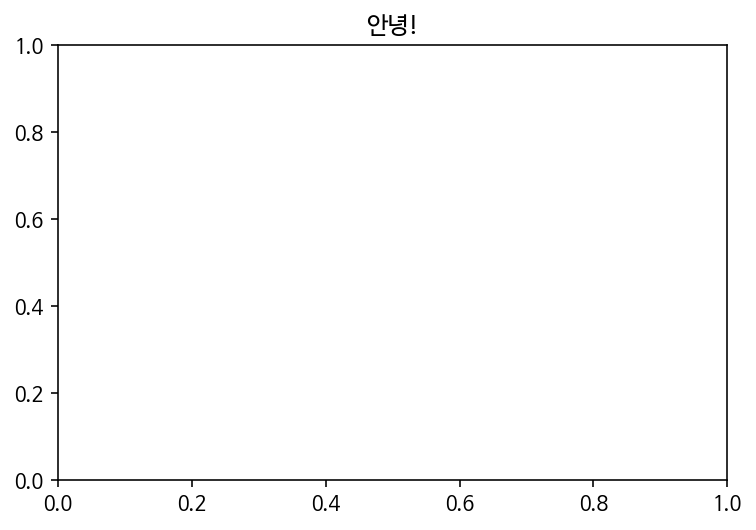

In [5]:
plt.title('안녕!')

In [6]:
bitcoin_df = pd.read_csv('/content/block3.csv', 
                         names=['day', 'price'], 
                         encoding='utf-8') 
bitcoin_df.head()

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44


In [7]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     366 non-null    object 
 1   price   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [8]:
# 시계열데이터는 시간적인 순서가 중요!
# 미래에 대한 수치를 예측하는 것!
# 최근 5일치를 검증용 데이터로 사용하게 됨.
# 5일치를 제외한 나머지 데이터를 훈련데이터로 사용함.

In [9]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df[:361]

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [10]:
pd.to_datetime(bitcoin_train_df['day'])

0     2020-12-09
1     2020-12-10
2     2020-12-11
3     2020-12-12
4     2020-12-13
         ...    
356   2021-11-30
357   2021-12-01
358   2021-12-02
359   2021-12-03
360   2021-12-04
Name: day, Length: 361, dtype: datetime64[ns]

In [11]:
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     361 non-null    datetime64[ns]
 1   price   361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [12]:
bitcoin_train_df.index

RangeIndex(start=0, stop=361, step=1)

In [13]:
bitcoin_train_df.set_index('day', inplace=True)
bitcoin_train_df.head(2)

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15


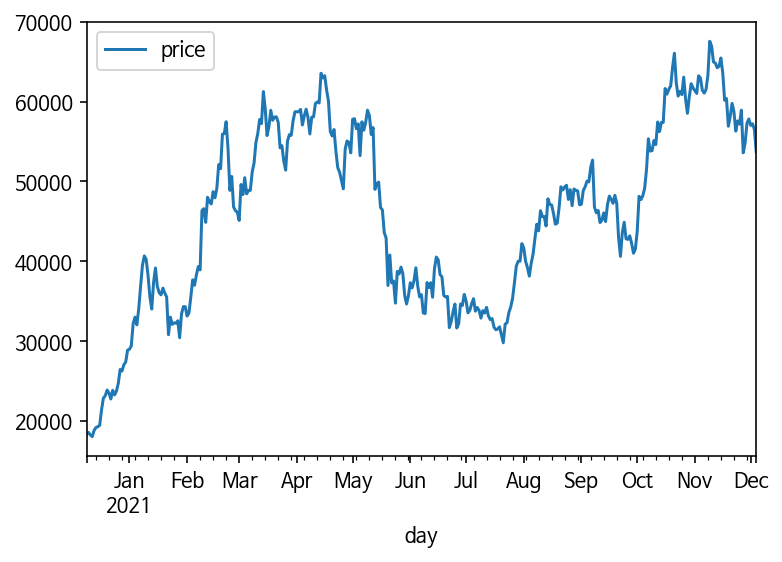

In [14]:
bitcoin_train_df.plot()

In [15]:
## ARIMA(아리마 모델) : 시계열의 유명한 모델
## AR+I+MA
## AR : 값들의 흐름의 특징을 가지고 예측하는 모델
## MA : 값들의 차이의 특징을 가지고 예측하는 모델
## I : AR+MA
## 월별, 계절별 trend도 예측할 수 있도록 해줌.

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [17]:
model = ARIMA(bitcoin_train_df.price.values, order=(2, 1, 2))

In [18]:
model_fit = model.fit(trend='c', full_output=True)

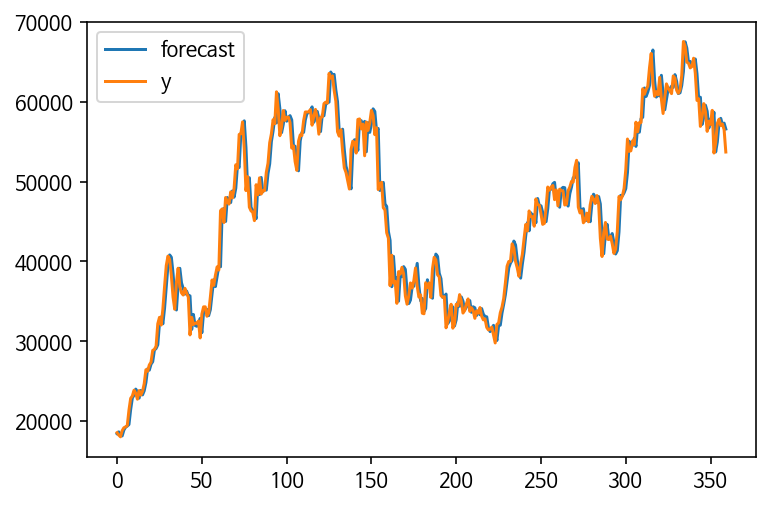

In [19]:
fig = model_fit.plot_predict()

In [20]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([53878.51041868, 53928.01418335, 53918.95039997, 53964.81109877,
        54116.40429724]),
 array([1882.64028629, 2611.29411865, 3183.32955089, 3707.1296496 ,
        4194.3311357 ]),
 array([[50188.60326172, 57568.41757564],
        [48809.97175776, 59046.05660894],
        [47679.73912929, 60158.16167064],
        [46698.97049954, 61230.651698  ],
        [45895.66633203, 62337.14226245]]))

In [23]:
pred_y = forecast_data[0].tolist()
pred_y

[53878.510418679354,
 53928.014183351304,
 53918.95039996678,
 53964.811098770224,
 54116.404297240966]

In [24]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [26]:
test_y = bitcoin_test_df.price.values.tolist()
test_y

[49253.86, 49380.43, 50564.63, 50645.41, 50511.12]

In [27]:
r2_score(test_y, pred_y)

-39.44916401714005

In [88]:
year_1_mse = mean_squared_error(test_y, pred_y)
year_1_mse

15467175.45274812

In [74]:
### 5년치가지고 해보시고, 최근의 5일을 맞추어보세요.!
bitcoin_df_5 = pd.read_csv('/content/market-price.csv')
bitcoin_df_5.head()

,Timestamp,market-price
0,2019-04-21 00:00:00,5309.28
1,2019-04-22 00:00:00,5281.83
2,2019-04-23 00:00:00,5377.19
3,2019-04-24 00:00:00,5518.16
4,2019-04-25 00:00:00,5434.19


In [75]:
bitcoin_df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     1095 non-null   object 
 1   market-price  1095 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [76]:
bitcoin_df_5['Timestamp'] = pd.to_datetime(bitcoin_df_5['Timestamp'])
bitcoin_df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     1095 non-null   datetime64[ns]
 1   market-price  1095 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [77]:
bitcoin_df_5.set_index('Timestamp', inplace=True)
bitcoin_df_5.head(2)

,market-price
Timestamp,
2019-04-21,5309.28
2019-04-22,5281.83


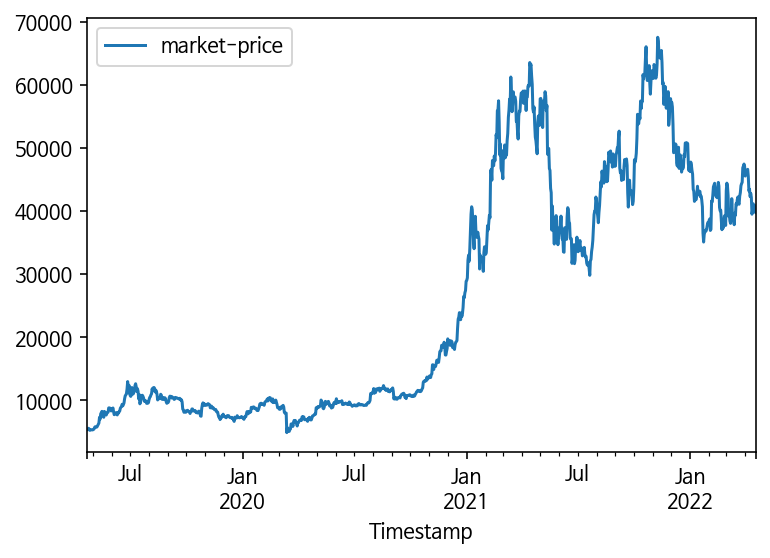

In [78]:
bitcoin_df_5.plot()

In [79]:
model2 = ARIMA(bitcoin_df_5['market-price'][:1090].values, order=(2, 1, 2))

In [80]:
model_fit2 = model2.fit(trend='c', full_output=True)

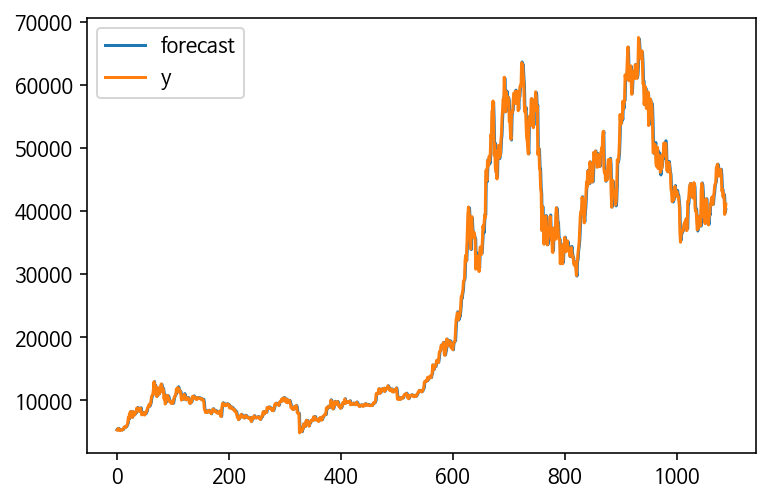

In [81]:
fig2 = model_fit2.plot_predict()

In [82]:
forecast_data2 = model_fit2.forecast(steps=5)
forecast_data2

(array([40984.14345285, 40754.48254665, 40758.41212892, 41018.39279628,
        41266.80927788]),
 array([1230.66936271, 1712.68033542, 2076.4544897 , 2397.14834542,
        2695.98442384]),
 array([[38572.07582507, 43396.21108063],
        [37397.69077219, 44111.2743211 ],
        [36688.63611357, 44828.18814428],
        [36320.06837366, 45716.7172189 ],
        [35982.77690427, 46550.84165149]]))

In [83]:
pred_y2 = forecast_data2[0].tolist()
pred_y2

[40984.143452851255,
 40754.48254664857,
 40758.41212892331,
 41018.39279628061,
 41266.80927788353]

In [84]:
test_y2 = bitcoin_df_5[1090:]
test_y2

,market-price
Timestamp,
2022-04-15,39939.90
2022-04-16,40566.20
2022-04-17,40388.78
2022-04-18,39711.45
2022-04-19,40805.72


In [85]:
bitcoin_df_5.tail(5)

,market-price
Timestamp,
2022-04-15,39939.90
2022-04-16,40566.20
2022-04-17,40388.78
2022-04-18,39711.45
2022-04-19,40805.72


In [86]:
r2_score(test_y2, pred_y2)

-2.9347018458466247

In [89]:
year_5_mse = mean_squared_error(test_y2, pred_y2)
year_5_mse

636645.0823713003

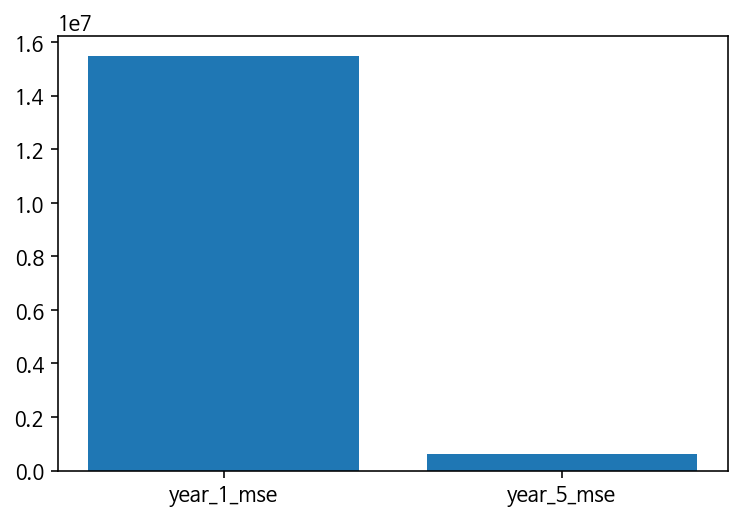

In [90]:
x = np.arange(2)
plt.bar(x, height= [
                    year_1_mse,
                    year_5_mse
            ])
plt.xticks(x, ['year_1_mse', 
               'year_5_mse']);

In [99]:
result_df_1 = pd.DataFrame({
      'day' : bitcoin_test_df.day,
      'pred_y' : pred_y,
      'test_y' : test_y
})
result_df_1

,day,pred_y,test_y
361,2021-12-05,53878.510419,49253.86
362,2021-12-06,53928.014183,49380.43
363,2021-12-07,53918.950400,50564.63
364,2021-12-08,53964.811099,50645.41
365,2021-12-09,54116.404297,50511.12


In [94]:
test_y2

,market-price
Timestamp,
2022-04-15,39939.90
2022-04-16,40566.20
2022-04-17,40388.78
2022-04-18,39711.45
2022-04-19,40805.72


In [97]:
result_df_2 = pd.DataFrame({
      'pred_y2' : pred_y2,
      'test_y2' : test_y2['market-price']
})
result_df_2

,pred_y2,test_y2
Timestamp,,
2022-04-15,40984.143453,39939.90
2022-04-16,40754.482547,40566.20
2022-04-17,40758.412129,40388.78
2022-04-18,41018.392796,39711.45
2022-04-19,41266.809278,40805.72


In [100]:
from fbprophet import Prophet

In [102]:
bitcoin_df_5_fb = pd.read_csv('/content/market-price2.csv', names = ['ds', 'y'])
bitcoin_df_5_fb.head()

,ds,y
0,2019-04-21 00:00:00,5309.28
1,2019-04-22 00:00:00,5281.83
2,2019-04-23 00:00:00,5377.19
3,2019-04-24 00:00:00,5518.16
4,2019-04-25 00:00:00,5434.19


In [103]:
bitcoin_df_5_fb['ds'] = pd.to_datetime(bitcoin_df_5_fb['ds'])
bitcoin_df_5_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1095 non-null   datetime64[ns]
 1   y       1095 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [104]:
bitcoin_df_5_fb.head(2)

,ds,y
0,2019-04-21,5309.28
1,2019-04-22,5281.83


In [108]:
prophet = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet.fit(bitcoin_df_5_fb)

In [111]:
future_data = phophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data3 = prophet.predict(future_data)
forecast_data3[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1095,2022-04-20,40676.209016,38441.021947,43133.614932
1096,2022-04-21,40711.450501,38613.448998,43098.621477
1097,2022-04-22,40416.957396,38085.869698,42779.976154
1098,2022-04-23,40417.901252,38062.637718,42786.589404
1099,2022-04-24,40376.438270,38252.000959,42765.355541


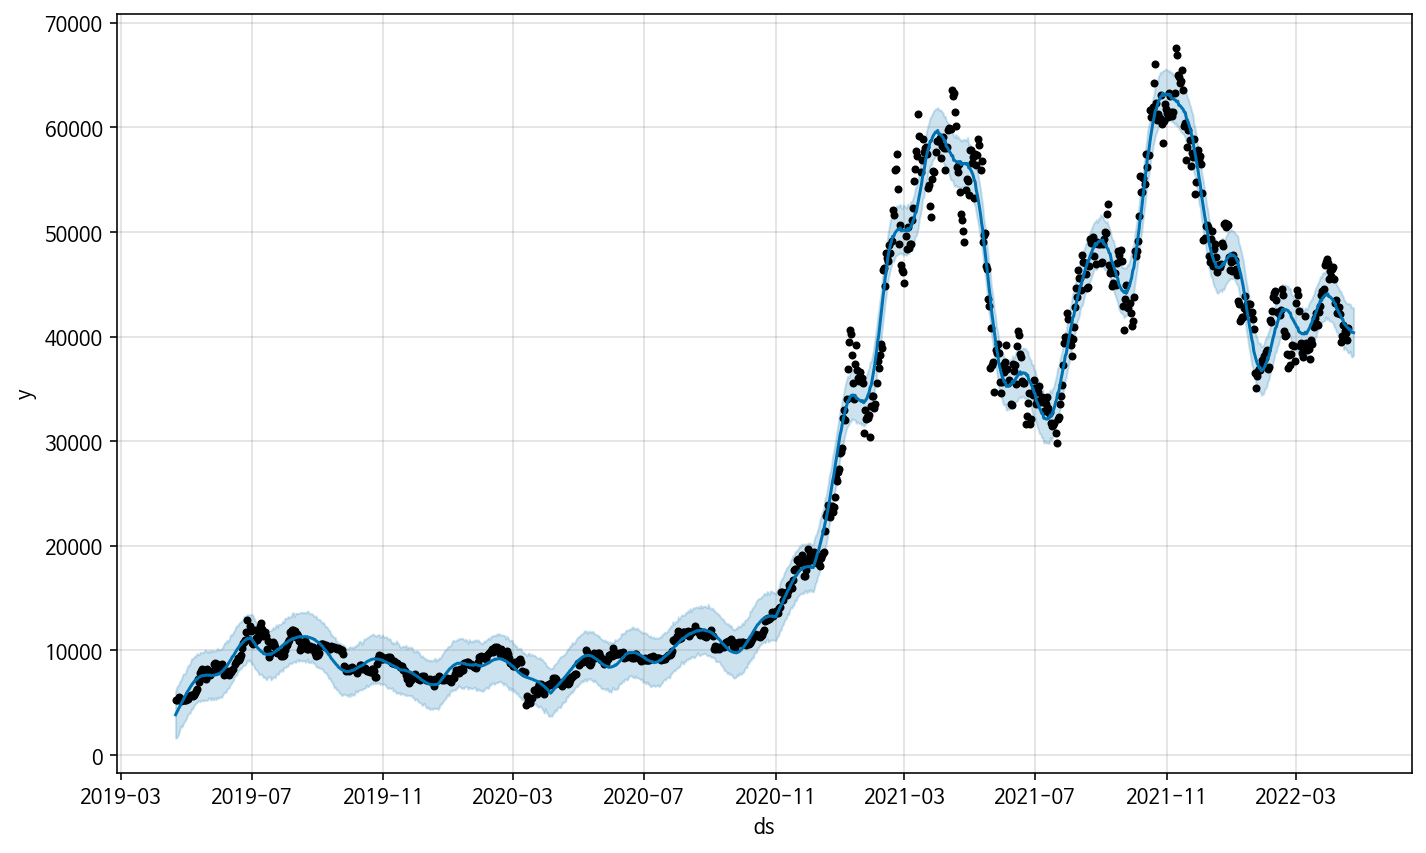

In [112]:
fig3 = prophet.plot(forecast_data3)

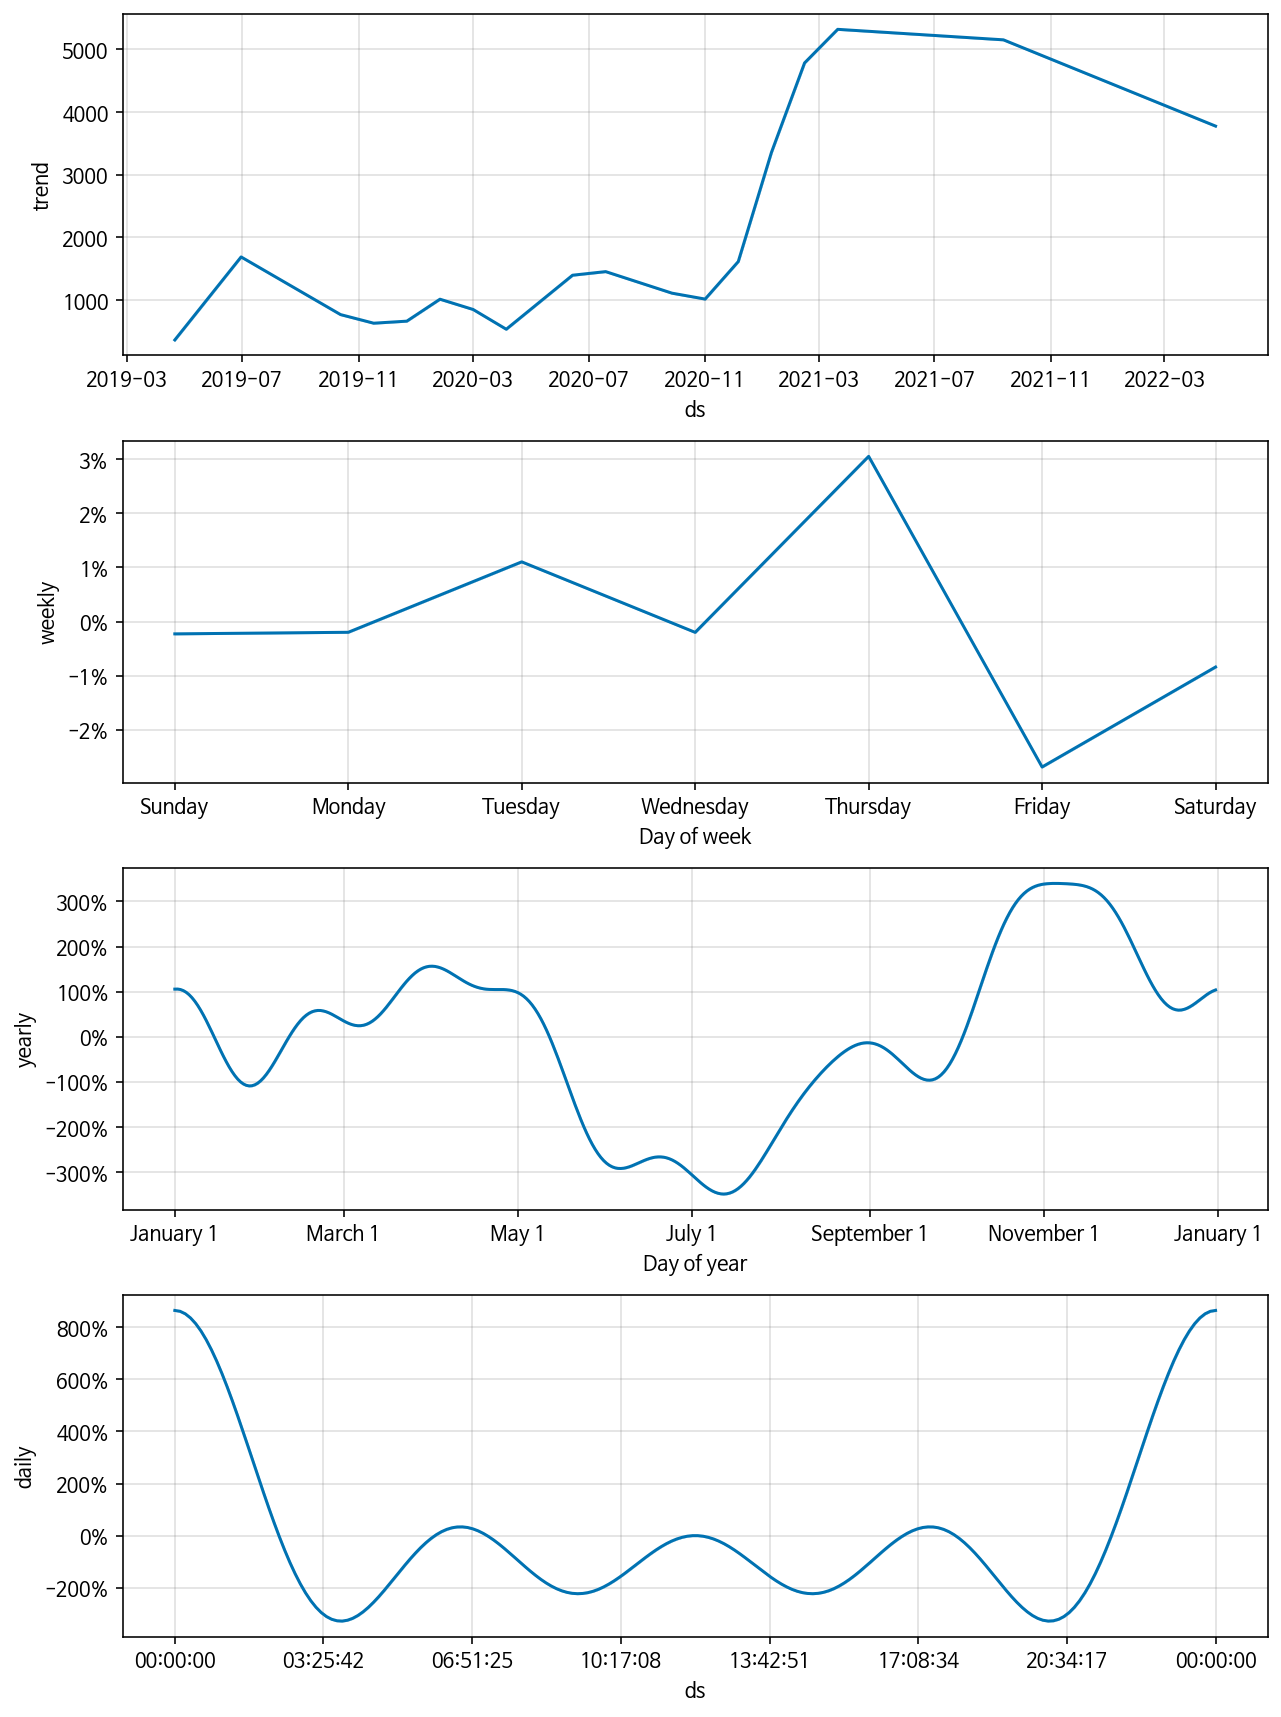

In [113]:
fig4 = prophet.plot_components(forecast_data3)

In [114]:
## mse를 구해보고 싶다.!
bitcoin_df_5_fb.tail(3)

,ds,y
1092,2022-04-17,40388.78
1093,2022-04-18,39711.45
1094,2022-04-19,40805.72


In [116]:
bitcoin_df_5_fb2_train = bitcoin_df_5_fb.iloc[:1090]
bitcoin_df_5_fb2_train.tail(3)

,ds,y
1087,2022-04-12,39488.62
1088,2022-04-13,40102.20
1089,2022-04-14,41148.06


In [117]:
bitcoin_df_5_fb2_test = bitcoin_df_5_fb.iloc[1090:]
bitcoin_df_5_fb2_test.tail(5)

,ds,y
1090,2022-04-15,39939.90
1091,2022-04-16,40566.20
1092,2022-04-17,40388.78
1093,2022-04-18,39711.45
1094,2022-04-19,40805.72


In [118]:
bitcoin_df_5_fb2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1090 non-null   datetime64[ns]
 1   y       1090 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [120]:
prophet2 = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet2.fit(bitcoin_df_5_fb2_train)

In [123]:
future_data2 = prophet2.make_future_dataframe(periods = 5, freq = 'd')
forecast_data4 = prophet.predict(future_data2)
forecast_data4[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1090,2022-04-15,41250.363120,38857.206699,43589.131099
1091,2022-04-16,41154.111090,38873.443108,43546.273900
1092,2022-04-17,41027.142206,38656.147195,43411.997133
1093,2022-04-18,40894.801613,38674.225571,43133.131056
1094,2022-04-19,40827.357241,38561.265682,43151.752105


In [126]:
result_df_3 = pd.DataFrame({
    'day' : bitcoin_df_5_fb2_test['ds'],
    'real_data' : bitcoin_df_5_fb2_test['y'],
    'pred_data' : forecast_data4['yhat'].tail(5)
})
result_df_3

,day,real_data,pred_data
1090,2022-04-15,39939.90,41250.363120
1091,2022-04-16,40566.20,41154.111090
1092,2022-04-17,40388.78,41027.142206
1093,2022-04-18,39711.45,40894.801613
1094,2022-04-19,40805.72,40827.357241


In [128]:
pb_mse = mean_squared_error(result_df_3['real_data'], result_df_3['pred_data'])
pb_mse

774249.7105584387

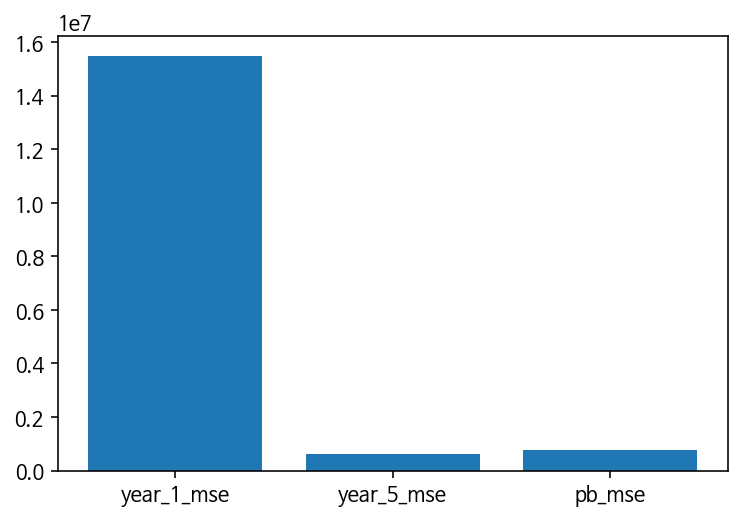

In [129]:
x = np.arange(3)
plt.bar(x, height= [
                    year_1_mse,
                    year_5_mse,
                    pb_mse
            ])
plt.xticks(x, ['year_1_mse', 
               'year_5_mse',
               'pb_mse'
               ]);